### Bag of Words Categorization - Ling Zhang

In [1]:
from pandas import DataFrame
import pandas as pd
import os
import io
import glob
import nltk
import sklearn
import re
from nltk.corpus import stopwords
from string import punctuation
import matplotlib.pyplot as plt
from pandas.plotting import andrews_curves

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/Fall/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
stop = stopwords.words('english')

In [4]:
stop.extend(['agent','visitor','comm100'])

In [5]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

#### Build a Bad of Words model

In [6]:
files = glob.glob('sample_data/*')

In [7]:
conversations = pd.DataFrame(columns = ["fileID", "Bag Of Words", "Category", "Validation"])
for file in files:
    f = open(file,'r', encoding='utf-16-le')
    conversation = f.read()[1:]
    no_punc_conv = re.sub('[' + punctuation + ']',' ', conversation)
    clean_conv = [word.lower() for word in no_punc_conv.split() if word.lower() not in stop]
    dframe = pd.DataFrame([[file, clean_conv, '0', '0']], columns = ["fileID", "Bag Of Words", "Category", "Validation"])
    conversations = conversations.append(dframe)
    f.close()
conversations.set_index("fileID", inplace = True)

In [8]:
len(conversations)

998

In [9]:
conversations.reset_index(level=0, inplace=True)
conversations.head()

,fileID,Bag Of Words,Category,Validation
0,sample_data/289.txt,"[brian, hello, indika, brian, help, indika, he...",0,0
1,sample_data/504.txt,"[norman, hello, terrum, norman, may, help, today]",0,0
2,sample_data/262.txt,"[prit, hi, samuel, thank, contacting, help, sa...",0,0
3,sample_data/276.txt,"[brian, hello, antonakis, hamalis, brian, help...",0,0
4,sample_data/510.txt,"[johnny, training, dear, jenna, thank, contact...",0,0


In [10]:
conversations['Bag Of Words'][3]

['brian',
 'hello',
 'antonakis',
 'hamalis',
 'brian',
 'help',
 'antonakis',
 'hamalis',
 'call',
 'ok',
 'brian',
 'ok',
 'great',
 'brian',
 'thank',
 'brian',
 'nice',
 'day',
 'operator',
 'brian',
 'left',
 'chat']

## Supervised clustering - Decision tree

### Level 1 Category (from Comm100 website): 
1. Setup & Getting Started
2. Settings & Customizations
3. Monitor & Chat 
4. Transcripts & Reports
5. Billing & Operator Management
6. Desktop & Mobile Apps
7. API & Webhooks
8. Troubleshooting

### Level 1 Keywords:
    1. Setup & Getting Started
setup, system, requirements, add, adding, install, installation, installing, code, coding, html, css, update, updated, version, versions, plugin, magento, corecommerce, prestashop, shopsite, drupal, 3dcart, static, button, americommerce, online, store, joomla, wix, opencart, wordpress, integrate, shopify, webs, weebly, facebook, blogsport, blog, ansak, sdk, account

    2. Settings & Customizations
customization, customizations, setting, settings, customize, font, color, colour, size, modify, modification, javascript, enabling, custom variable, language, gotomeeting, salesforce, crm, api, embedded, popup, canned, url, zendesk, preview, offline, style, image, button, google analytics, redirect, translate, translation, pre-chat, console, sound alert, interface, notifications, notification, change, arabic, hebrew, branding, logo, greeting, queue, rating, accept, departments, department, campaign, logical, segmentation, expression, routing, dynamic, browser, title, bio, remove, twitter, disable, upgrade, knowledge, base, wait

    3. Monitor & Chat 
duration, minutes, password, filter, referrers, referrer, ban, block, stop, send, transfer, spellcheck, spell check, login, private, pm, console, show, monitor 

    4. Transcripts & Reports
transcripts, transcript, report, reports, history, attachment, counts, count, performance, offline, social media 

    5. Billing & Operator Management
offer, discount, billing, billed, management, manage, multiagents, pay, credit, card, payment, payments, process, reset, maximumon, switch, cancel, register, delete, upgrade, confirm, balance, transaction, audit, log, paypal, subscribe, subscription,   
    
    6. Desktop & Mobile Apps
uninstalling, uninstall, iphone, android, desktop, app, download, windows, mac, apple

    7. API & Webhooks
webhooks, api, webhook

    8. Troubleshooting
troubleshooting, trouble, troubles, disappears, disappear, disappeared, error, bug, id, problems, problem, wrong

In [11]:
categories = [
    'Setup & Getting Started', 
    'Settings & Customizations', 
    'Monitor & Chat', 
    'Transcripts & Reports', 
    'Billing & Management', 
    'Desktop & Mobile Apps', 
    'API & Webhooks', 
    'Troubleshooting']

In [12]:
keywordsRaw = [
    'setup, system, requirements, add, adding, install, installation, installing, code, coding, html, css, update, updated, version, versions, plugin, magento, corecommerce, prestashop, shopsite, drupal, 3dcart, static, button, americommerce, online, store, joomla, wix, opencart, wordpress, integrate, shopify, webs, weebly, facebook, blogsport, blog, ansak, sdk, account',
    'customization, customizations, setting, settings, customize, font, color, colour, size, modify, modification, javascript, enabling, custom variable, language, gotomeeting, salesforce, crm, api, embedded, popup, canned, url, zendesk, preview, offline, style, image, button, google analytics, redirect, translate, translation, pre-chat, console, sound alert, interface, notifications, notification, change, arabic, hebrew, branding, logo, greeting, queue, rating, accept, departments, department, campaign, logical, segmentation, expression, routing, dynamic, browser, title, bio, remove, twitter, disable, upgrade, knowledge, base, wait',
    'duration, minutes, password, filter, referrers, referrer, ban, block, stop, send, transfer, spellcheck, spell check, login, private, pm, console, show, monitor',
    'transcripts, transcript, report, reports, history, attachment, counts, count, performance, offline, social media',
    'offer, discount, billing, billed, management, manage, multiagents, pay, credit, card, payment, payments, process, reset, maximumon, switch, cancel, register, delete, upgrade, confirm, balance, transaction, audit, log, paypal, subscribe, subscription',
    'uninstalling, uninstall, iphone, android, desktop, app, download, windows, mac, apple',
    'webhooks, api, webhook',
    'troubleshooting, trouble, troubles, disappears, disappear, disappeared, error, bug, id, problems, problem, wrong',
]

In [13]:
keywords = []
for key in keywordsRaw:
    no_punc_key = re.sub('[' + punctuation + ']',' ', key)
    clean_key = [word.lower() for word in no_punc_key.split()]
    keywords.append(clean_key)

In [14]:
keywords[7]

['troubleshooting',
 'trouble',
 'troubles',
 'disappears',
 'disappear',
 'disappeared',
 'error',
 'bug',
 'id',
 'problems',
 'problem',
 'wrong']

### Categorize each chat with keywords matching

In [23]:
catCount = [0, 0, 0, 0, 0, 0, 0, 0]
for i in range(len(conversations)):
    for j in range(len(keywords)):
        if (pd.Series(list(set(conversations['Bag Of Words'][i]).intersection(set(keywords[j])))).empty):
               conversations["Category"][i] = categories[j+1]
               catCount[j] = catCount[j]+1
               break            

In [16]:
conversations.head()

,fileID,Bag Of Words,Category,Validation
0,sample_data/289.txt,"[brian, hello, indika, brian, help, indika, he...",Desktop & Mobile Apps,0
1,sample_data/504.txt,"[norman, hello, terrum, norman, may, help, today]",Settings & Customizations,0
2,sample_data/262.txt,"[prit, hi, samuel, thank, contacting, help, sa...",Billing & Management,0
3,sample_data/276.txt,"[brian, hello, antonakis, hamalis, brian, help...",Settings & Customizations,0
4,sample_data/510.txt,"[johnny, training, dear, jenna, thank, contact...",Settings & Customizations,0


In [24]:
catCount

[577, 18, 145, 155, 56, 38, 9, 0]

In [32]:
categoryCount = pd.DataFrame(columns = ["Category", "Count"])
for i in range(7):
    dframe = pd.DataFrame([[categories[i], catCount[i]]], columns = ["Category", "Count"])
    categoryCount = categoryCount.append(dframe)
categoryCount

,Category,Count
0,Setup & Getting Started,577
0,Settings & Customizations,18
0,Monitor & Chat,145
0,Transcripts & Reports,155
0,Billing & Management,56
0,Desktop & Mobile Apps,38
0,API & Webhooks,9


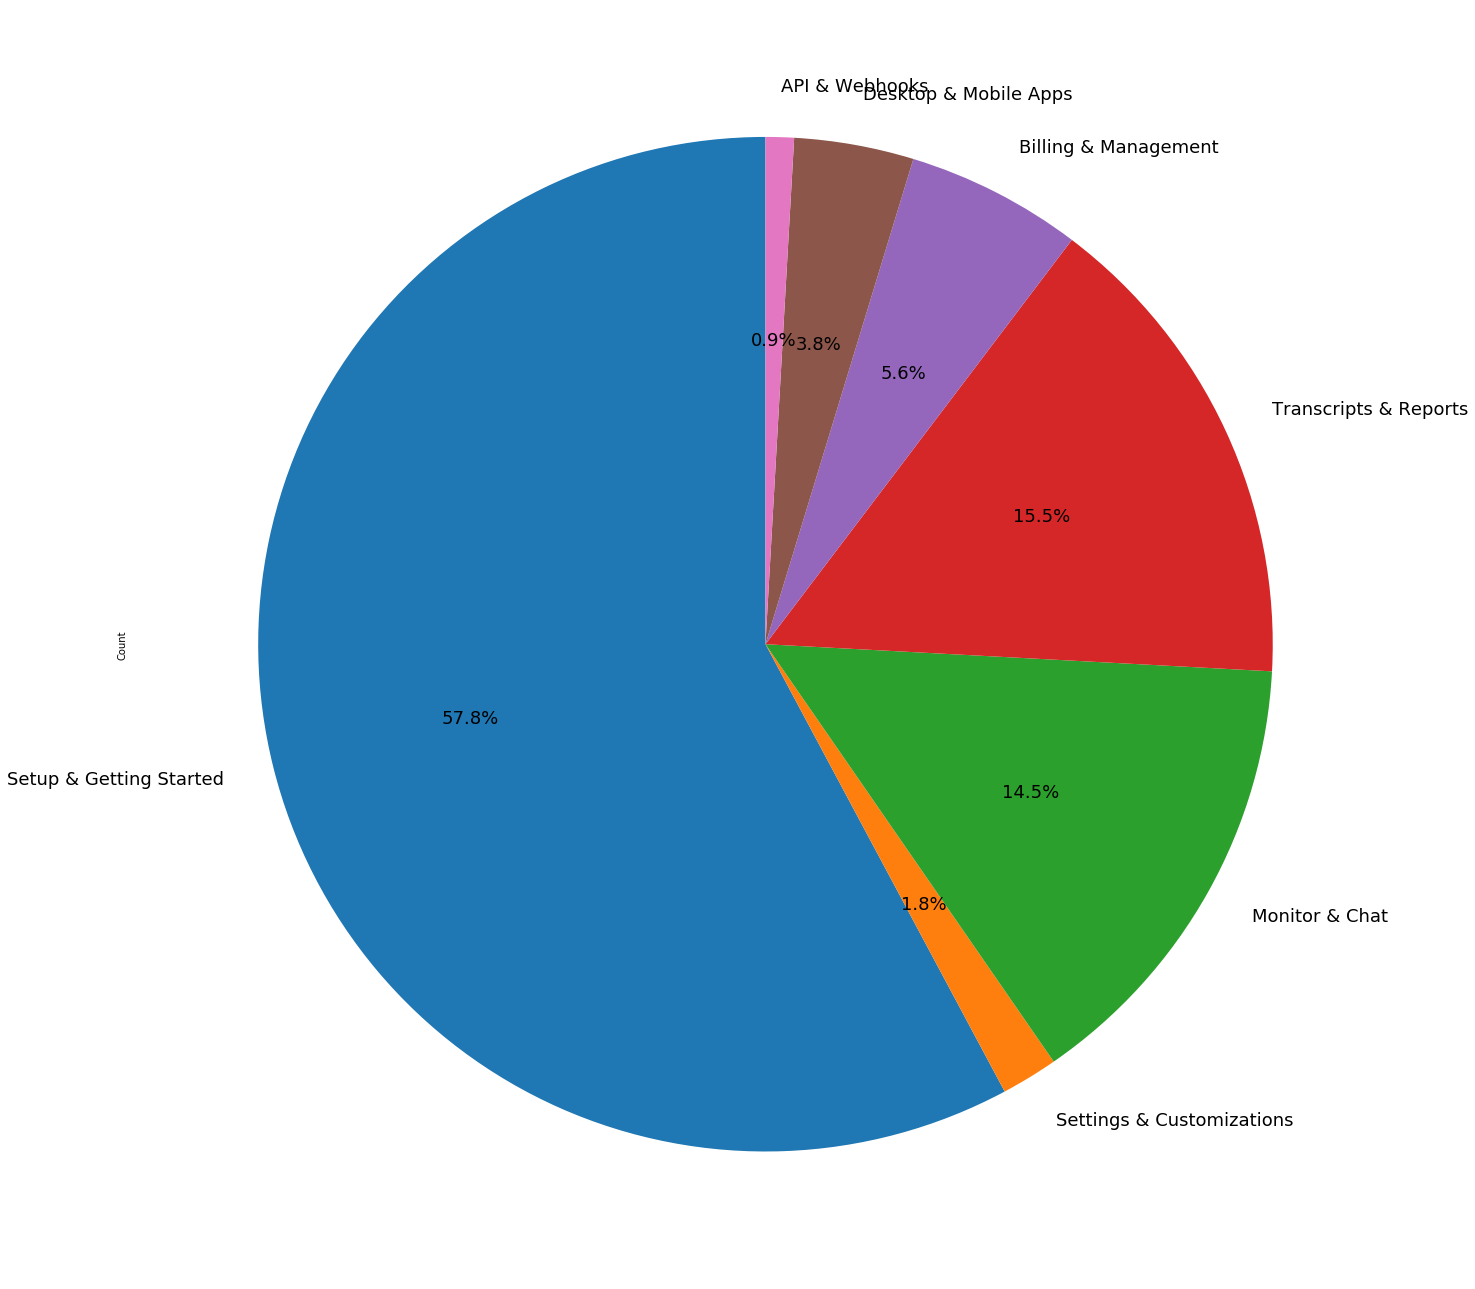

In [38]:
plt.figure(figsize=(50,50))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
categoryCount.plot(kind='pie', y = 'Count', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=categoryCount['Category'], legend = False, fontsize=18)
plt.show()